# Library Import

In [34]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go 
from sklearn.cross_validation import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import keras
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle
from seaborn import heatmap
%matplotlib inline

# Histograms

In [35]:
team= pd.read_csv('Final Team.csv') # importing the data
a=team['0-3 feet FGA %']
b=team['3-10 feet FGA %']
c=team['10-16 feet FGA %']
d=team['16 feet and away FGA %']
hist_data=[a,b,c,d]
group_labels=['0-3 feet FGA %','3-10 feet FGA% ','10-16 feet FGA %','16 feet and away FGA %']
fig = ff.create_distplot(hist_data,group_labels,bin_size=0.02)
py.plot(fig, filename='Distplot with Multiple Datasets') # making the plot

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


''

In [36]:
player=pd.read_csv('Final Player.csv')
player=player.iloc[8681:,0:25]
player=player.dropna(axis=0,how='any')
a=player['Total Rebound %']
b=player['Assist %']
e=player['Turn Over %']
hist_data=[a,b,e]
group_labels=['Total Rebound %','Assist %','Turn Over %']
fig = ff.create_distplot(hist_data,group_labels,bin_size=10)
py.plot(fig, filename='Distplot with Multiple Datasets')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


''

# Player Data Import, Slicing and Dicing

In [37]:
player=pd.read_csv('Final Player.csv')
player=player.iloc[:,0:25] # selecting 
player=player.drop(['Year','Team','Player','Minutes Played'],axis=1) # removing the selected columns
player=player.iloc[0:16859:,] 
player=player.dropna(axis=0,how='any') # removing the NA values
x=player.iloc[:,0:21]  # independent variables
y=player['Value of Replacement Player'] # dependent variable

# Training and Testing Sets

In [38]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Gradient Boosting Regression for Final Player Dataset

In [39]:
grad=GradientBoostingRegressor(max_depth=10)
fit=grad.fit(x_train,y_train)
predict=grad.predict(x_test)
score=r2_score(y_test,predict)
score

0.99989386154534166

# Generating Cross Validated Estimates

In [40]:
predicted = cross_val_predict(grad, x, y, cv=10)

# Plotting the Cross Validated Model

In [41]:
trace1 = go.Scatter(x=y, y=predicted, mode='markers',
                    marker = dict(size=8,
                                  color='rgb(0, 0, 255)',
                                  line=dict(
                                    width=2,
                                    color='rgb(0, 0, 0)'))
                   )
trace2 = go.Scatter(x=[y.min(), y.max()],y=[y.min(), y.max()],
                    line = dict(color=('rgb(0, 0, 0)'),
                                width=5, dash='dash')
                   )
layout = go.Layout(showlegend=False,
                   yaxis=dict(
                    range = [-10,60],
                    zeroline=False,
                    title='Predicted'),
                   xaxis=dict(
                    title='Measured',)
                  )

fig = go.Figure(data = [trace1,trace2], layout = layout)
py.plot(fig, filename="c-v-predict")


Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


''

# Neural Network Prediction for Player Dataset

In [42]:
data = pd.read_csv('./players.csv')
for name in data.columns:
    if 'Unnamed' in name:
        del data[name]
print(data.columns)

Index(['Age', 'Games', 'Minutes Played', 'Player Efficiency Rating',
       'True Shooting %', 'Free Throw Attempt Rate', 'Offensive Rebound %',
       'Defensive Rebound %', 'Total Rebound %', 'Assist %', 'Steal %',
       'Block %', 'Turn Over %', 'Usage %', 'Offensive Win Shares',
       'Defensive Win Shares', 'Win Shares', 'Win Shares per 48 minutes',
       'Offensive Box Plus/Minus', 'Defensive Box Plus Minus',
       'Box Plus Minus', 'Value of Replacement Player'],
      dtype='object')


In [43]:
print(len(data))
data = data.dropna(axis=0, how='any')
print(len(data))

17729
16781


## Normalize data

In [44]:
for col_name in data.columns:
    if '%' in col_name:
        data[col_name] /= 100.
    else:
        a = data[col_name]
        a = a - a.min()
        a = a / a.max()
        data[col_name] = a

data.head()

,Age,Games,Minutes Played,Player Efficiency Rating,True Shooting %,Free Throw Attempt Rate,Offensive Rebound %,Defensive Rebound %,Total Rebound %,Assist %,...,Turn Over %,Usage %,Offensive Win Shares,Defensive Win Shares,Win Shares,Win Shares per 48 minutes,Offensive Box Plus/Minus,Defensive Box Plus Minus,Box Plus Minus,Value of Replacement Player
0,0.307692,1.000000,1.000000,0.483842,0.00481,0.056667,0.080,0.258,0.170,0.068,...,0.135,0.233,0.251366,0.594059,0.355263,0.561181,0.600559,0.485348,0.667585,0.233577
1,0.423077,1.000000,0.910916,0.499317,0.00521,0.054333,0.036,0.064,0.050,0.222,...,0.128,0.268,0.502732,0.267327,0.416667,0.567212,0.639665,0.459707,0.693297,0.401460
2,0.538462,0.987654,0.892219,0.490214,0.00489,0.060833,0.102,0.227,0.164,0.065,...,0.123,0.216,0.360656,0.574257,0.434211,0.569151,0.614525,0.503663,0.690542,0.379562
3,0.423077,0.938272,0.883695,0.497041,0.00533,0.038833,0.080,0.256,0.170,0.157,...,0.139,0.188,0.502732,0.574257,0.543860,0.577553,0.630354,0.520147,0.715335,0.532847
4,0.307692,0.962963,0.874622,0.512517,0.00567,0.068667,0.078,0.247,0.164,0.134,...,0.158,0.261,0.546448,0.495050,0.548246,0.578199,0.635940,0.496337,0.707071,0.481752


## Divide data into train/test

In [45]:
def get(df, predict_col_name):
    Y = df[predict_col_name]
    X = df.loc[:, df.columns != predict_col_name]
    return X.as_matrix(), Y.as_matrix()


data = shuffle(data)
train_percentage = 0.8
l = int(len(data) * train_percentage)
train_data = data.iloc[: l, :]
test_data = data.iloc[l :, :]

dependent_variable = 'Defensive Rebound %'
train_x, train_y = get(train_data, dependent_variable)
test_x, test_y = get(test_data, dependent_variable)

In [46]:
train_x.shape

(13424, 21)

# Training

In [47]:
net_input = Input(shape=(train_x.shape[1],))
x = Dense(64, activation='sigmoid')(net_input)
x = Dense(32, activation='tanh')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=net_input, outputs=out)
model.compile(optimizer='sgd', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(train_x, train_y, batch_size=256, epochs=50, validation_data=(test_x, test_y))

Train on 13424 samples, validate on 3357 samples
Epoch 1/50
13424/13424 [==============================] - 0s - loss: 0.1393 - val_loss: 0.0212
Epoch 2/50
13424/13424 [==============================] - 0s - loss: 0.0116 - val_loss: 0.0071
Epoch 3/50
13424/13424 [==============================] - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 4/50
13424/13424 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0046
Epoch 5/50
13424/13424 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0044
Epoch 6/50
13424/13424 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0044
Epoch 7/50
13424/13424 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0044
Epoch 8/50
13424/13424 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0043
Epoch 9/50
13424/13424 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0043
Epoch 10/50
13424/13424 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0043


# Shots Data Import

In [49]:
shots=pd.read_csv('shots1.csv')
shots=shots.iloc[:,3:31]
y=shots['NBA_FANTASY_PTS']
del shots['NBA_FANTASY_PTS']
x=shots
shots=shots.dropna(axis=0,how='any')

# Training and Testing Sets

In [50]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Gradient Boosting Regression

In [59]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
grad=GradientBoostingRegressor(**params)
fit=grad.fit(x_train,y_train)
predict=grad.predict(x_test)
mse=mean_squared_error(y_test,predict)
print(mse)

0.31524591915


# Plotting the Loss Function for Gradient Boosting

In [52]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(predict):
    test_score[i] = grad.loss_(y_test, y_pred)

train = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
                   y=grad.train_score_, 
                   name='Training Set Deviance',
                   mode='lines',
                   line=dict(color='blue')
                  )
test = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
                  y=test_score, 
                  mode='lines',
                  name='Test Set Deviance',
                  line=dict(color='red')
                 )

layout = go.Layout(title='Deviance',
                   xaxis=dict(title='Boosting Iterations'),
                   yaxis=dict(title='Deviance')
                  )

fig = go.Figure(data=[test, train], layout=layout)
py.plot(fig)  

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


''

# Plotting the Feature Importance obtained from Gradient Boosting Model

In [53]:
feature_importance = grad.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
trace = go.Bar(x=feature_importance[sorted_idx],
               y=shots.columns[sorted_idx],
               orientation = 'h'
              )

layout = go.Layout(xaxis=dict(title='Relative Importance'),
                   yaxis=dict(title='Variable Importance')
                  )
fig = go.Figure(data=[trace], layout=layout)
py.plot(fig) 

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


''

# Neural Network Prediction for Shots1 Dataset

In [54]:
data = pd.read_csv('./shots1.csv')
for name in data.columns:
    if 'Unnamed' in name:
        del data[name]
print(data.columns)

Index(['AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS'],
      dtype='object')


In [55]:
print(len(data))
data = data.dropna(axis=0, how='any')
print(len(data))

434
434


# Normalize & visualize data

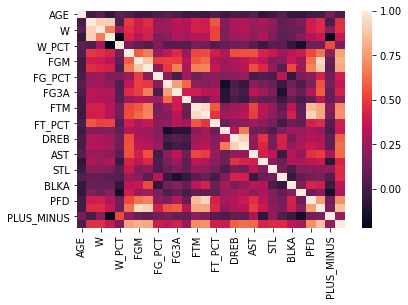

In [56]:
for col_name in data.columns:
    if '_PCT' in col_name:
        data[col_name] /= 1.
    else:
        a = data[col_name]
        a = a - a.min()
        a = a / a.max()
        data[col_name] = a

data.head()
heatmap(data.corr())

# Divide data into train/test

In [57]:
def get(df, predict_col_name):
    Y = df[predict_col_name]
    X = df.loc[:, df.columns != predict_col_name]
    return X.as_matrix(), Y.as_matrix()


data = shuffle(data)
train_percentage = 0.8
l = int(len(data) * train_percentage)
train_data = data.iloc[: l, :]
test_data = data.iloc[l :, :]

dependent_variable = 'NBA_FANTASY_PTS'
train_x, train_y = get(train_data, dependent_variable)
test_x, test_y = get(test_data, dependent_variable)

print('train input shape:', train_x.shape)
print('test  input shape:', test_x.shape)

train input shape: (347, 27)
test  input shape: (87, 27)


# Neural Network Training

In [58]:
net_input = Input(shape=(train_x.shape[1],))
x = Dense(64, activation='sigmoid')(net_input)
x = Dense(32, activation='tanh')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=net_input, outputs=out)
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 27)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1792      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_x, 
          train_y, 
          batch_size=256, 
          epochs=500, 
          validation_data=(test_x, test_y), 
          callbacks=[TensorBoard(log_dir='./train_logs/')])